New Scractchbook with just usd from 'Price' column

In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Import statistical module
from scipy import stats

# Import custom modules
import acquire
import prepare
import explore

# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Wrangle

In [2]:
# Acquire and prepare data returned as dataframe
df = acquire.get_data(query_url = False)
print(df.shape)
df = prepare.prepare_dataframe(df)
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (20155, 60), (20156, 60))

In [3]:
df

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy
0,0000579f-7b35-4ed3-b44c-db2a538066fe,Fury Sliver,en,2006-10-06,normal,True,highres_scan,{5}{R},6.0,Creature — Sliver,All Sliver creatures have double strike.,3,3,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,c1d109bc-ffd8-428f-8d7d-3f8d7e648046,tsp,Time Spiral,expansion,157,False,uncommon,"""A rift opened, and our arrows were abruptly s...",Paolo Parente,black,2003,False,False,True,False,5608.0,10402.0,"{'usd': '0.33', 'usd_foil': '4.50', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.33,True,False,False
1,00006596-1166-4a79-8443-ca9f82e6db4e,Kor Outfitter,en,2009-10-02,normal,True,highres_scan,{W}{W},2.0,Creature — Kor Soldier,"When Kor Outfitter enters the battlefield, you...",2,2,[W],[W],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,eb16a2bd-a218-4e4e-8339-4aa1afc0c8d2,zen,Zendikar,expansion,21,False,common,"""We take only what we need to survive. Believe...",Kieran Yanner,black,2003,False,False,True,False,13482.0,4743.0,"{'usd': '0.37', 'usd_foil': '7.22', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.37,True,False,False
2,0000a54c-a511-4925-92dc-01b937f9afad,Spirit,en,2015-05-22,token,True,highres_scan,,0.0,Token Creature — Spirit,Flying,1,1,[W],[W],[Flying],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,f7aa47c6-c1e2-4de5-9a68-4406d84bd6bb,tmm2,Modern Masters 2015 Tokens,token,5,False,common,no_flavor_text,Mike Sass,black,2015,False,False,True,False,0.0,0.0,"{'usd': '0.08', 'usd_foil': None, 'usd_etched'...",[setpromo],no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.08,False,False,False
3,0000cd57-91fe-411f-b798-646e965eec37,Siren Lookout,en,2017-09-29,normal,True,highres_scan,{2}{U},3.0,Creature — Siren Pirate,Flying\nWhen Siren Lookout enters the battlefi...,1,2,[U],[U],"[Flying, Explore]","{'standard': 'not_legal', 'future': 'not_legal...","[arena, paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,fe0dad85-54bc-4151-9200-d68da84dd0f2,xln,Ixalan,expansion,78,False,common,no_flavor_text,Chris Rallis,black,2015,False,False,True,False,11917.0,8306.0,"{'usd': '0.04', 'usd_foil': '0.21', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.04,True,False,False
4,00012bd8-ed68-4978-a22d-f450c8a6e048,Web,en,1994-04-01,normal,True,highres_scan,{G},1.0,Enchantment — Aura,Enchant creature (Target a creature as you cas...,0,0,[G],[G],[Enchant],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,45a69797-8adf-468e-a4e1-ba81fd9d66ac,3ed,Revised Edition,core,229,False,rare,no_flavor_text,Rob Alexander,white,1993,False,False,True,False,18559.0,0.0,"{'usd': '1.01', 'usd_foil': None, 'usd_etched'...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,1.01,False,False,False
...,...,...

### External Module Function Test Area

/Users/ultimate/codeup-data-science/scratchbook_for_current_gp_proj/Jason/explore.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nonfoil_only'] = (df.loc[:, 'nonfoil'] == True) & (df.loc[:, 'foil'] == False)
/Users/ultimate/codeup-data-science/scratchbook_for_current_gp_proj/Jason/explore.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['foil_and_nonfoil'] = df.loc[:, 'nonfoil'] == df.loc[:, 'foil']
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1681: SettingWit

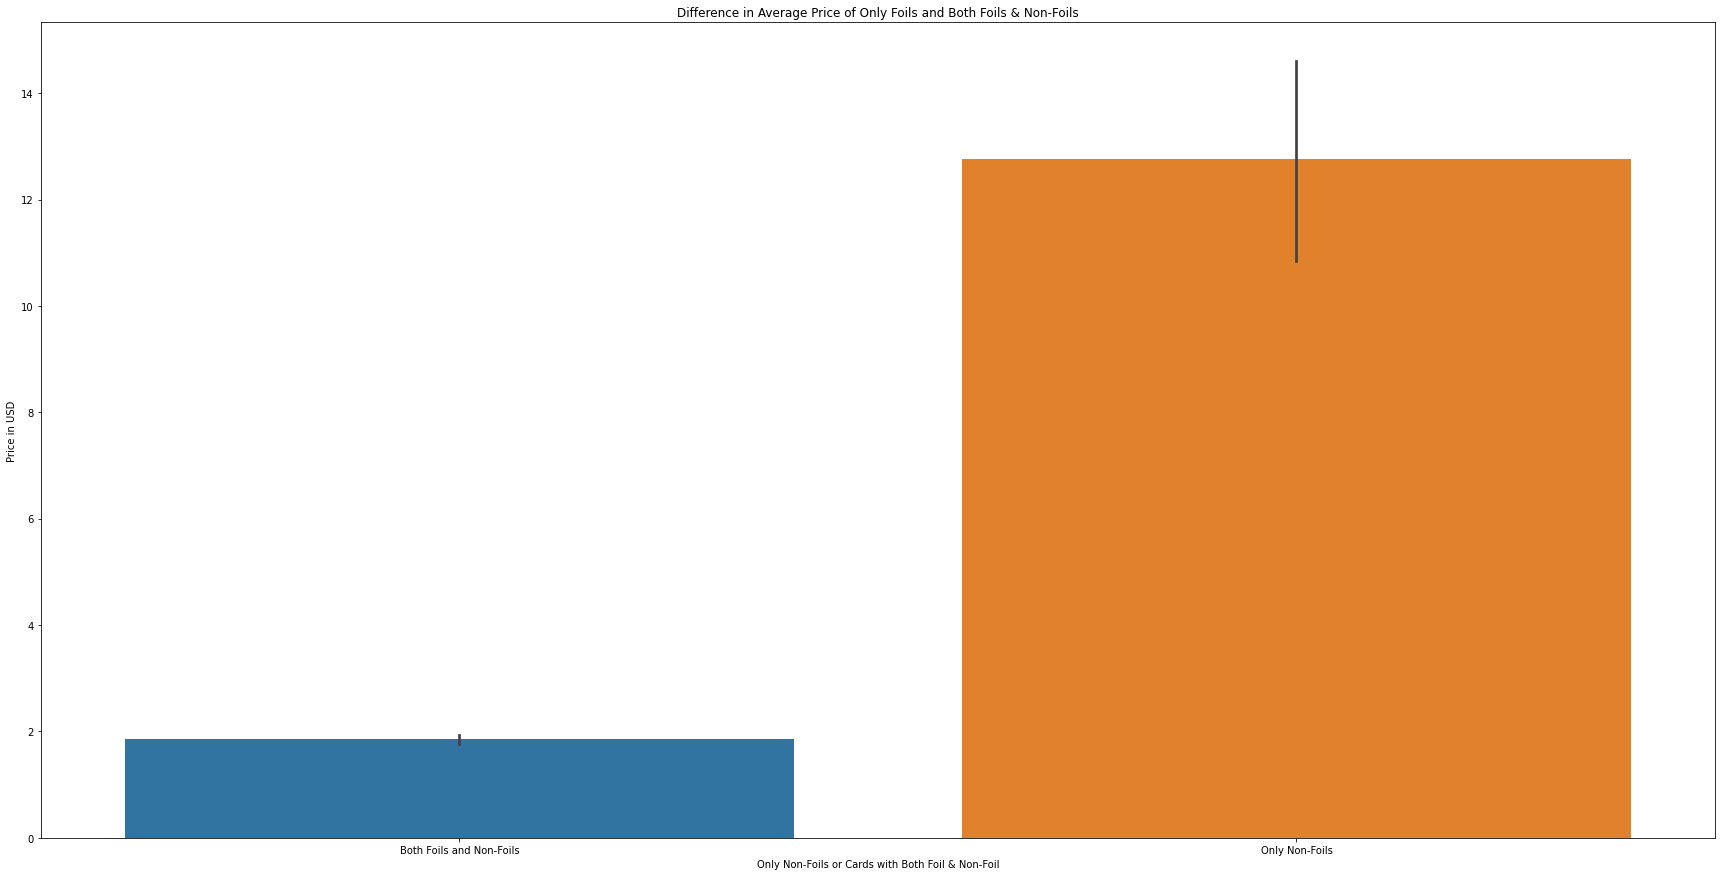

(None,
 'The average USD price of non-foil only cards is $12.76,  and for cards with both foil and non-foil is $1.85. The difference in average price is $10.91.')

In [4]:
explore.nonfoil_only_or_not_viz(train)

In [5]:
explore.q1_hypothesis_test(train)

Variance for non-foil only cards is 15743.686.
Variance for cards with both foil and non-foil cards is 50.2.
The t-statistic is -11.302 less than 0, and the p-value of 8.201e-30 is statistically significant.
We reject the Null Hypothesis


## Q1: Is there a significant difference in usd between non-foil only cards and non-foil cards with foil versions?

## Key takeaway:
- Taking into account all sets the difference in favor of non-foil only cards is about $10.91

## Discussion:
- The alternate hypothesis that there is a statistically significant difference between the prices of non-foil only cards and cards with both foil & non-foil versions is True.

In [6]:
# Creates column for cards that have both foil & non-foil versions
train['foil_and_nonfoil'] = train['nonfoil'] == train['foil']

# Shows number of cards and percentage of cards with both versions
train.foil_and_nonfoil.value_counts(), train.foil_and_nonfoil.value_counts(normalize = True)

/var/folders/tg/c6tcjwk13mj583lxrf25k3jm0000gn/T/ipykernel_29621/4029545030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['foil_and_nonfoil'] = train['nonfoil'] == train['foil']


(True     23367
 False    16944
 Name: foil_and_nonfoil, dtype: int64,
 True     0.579668
 False    0.420332
 Name: foil_and_nonfoil, dtype: float64)

In [7]:
# Creates column for cards that have only non-foil versions
train['nonfoil_only'] = (train['nonfoil'] == True) & (train['foil'] == False)

# Shows number of cards and percentage of cards with with only non-foil versions
train.nonfoil_only.value_counts(), train.nonfoil_only.value_counts(normalize = True)

/var/folders/tg/c6tcjwk13mj583lxrf25k3jm0000gn/T/ipykernel_29621/4174067358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nonfoil_only'] = (train['nonfoil'] == True) & (train['foil'] == False)


(False    23367
 True     16944
 Name: nonfoil_only, dtype: int64,
 False    0.579668
 True     0.420332
 Name: nonfoil_only, dtype: float64)

In [8]:
def add_nonfoil_only_and_both_foil_and_nonfoil_columns(df):
    '''
    Adds columns to dataframe for cards with only non-foil versions
    and those with both foil and non-foil versions.
    '''
    # Creates column for cards that have only non-foil versions
    df['nonfoil_only'] = (df.loc[:, 'nonfoil'] == True) & (df.loc[:, 'foil'] == False)
    
    # Creates column for cards that have both foil & non-foil versions
    df['foil_and_nonfoil'] = df.loc[:, 'nonfoil'] == df.loc[:, 'foil']
    return df


def add_columns_with_usd_prices_for_nonfoil_cards(df):
    '''
    Adds columns to dataframe with the usd prices of all non-foil cards with 
    separate columns for non-foil only and both foil & non-foil cards.
    '''
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['nonfoil_only'] == True, 'nonfoil_only_usd'] = df['usd']
    
    # Creates a column with USD prices for cards with both foil and non-foil versions
    df.loc[df['foil_and_nonfoil'] == True, 'foil_and_nonfoil_usd'] = df['usd']
    return df


def avg_nonfoil_only_and_both_foil_and_nonfoil_and_diff(df):
    '''
    Returns the average price of cards in USD for non-foil only and card with both foin and non-foil versions.
    '''
    avg_nonfoil_only = df.nonfoil_only_usd.mean()
    avg_foil_and_nonfoil = df.foil_and_nonfoil_usd.mean()
    return f'The average USD price of non-foil only cards is ${round(avg_nonfoil_only, 2)},  and for cards with both foil and non-foil is ${round(avg_foil_and_nonfoil, 2)}. The difference in average price is ${round((avg_nonfoil_only - avg_foil_and_nonfoil),2)}.'


def only_foil_vs_both_versions_viz(df):
    '''
    Creates a violin plot for columns in the dataframe for if it's non-foil only or not.
    '''
    plt.figure(figsize = (30,15))
    sns.barplot(x = 'nonfoil_only', y = 'usd', data = df)
    plt.title('Difference in Average Price of Only Foils and Both Foils & Non-Foils')
    plt.xlabel('Only Non-Foils or Cards with Both Foil & Non-Foil')
    plt.ylabel('Price in USD')
    plt.xticks([0, 1],['Both Foils and Non-Foils', 'Only Non-Foils'])
    return plt.show()


def nonfoil_only_or_not_viz(df):
    '''
    Combines explore functions for question one visualization
    '''
    df = add_nonfoil_only_and_both_foil_and_nonfoil_columns(df)
    df = add_columns_with_usd_prices_for_nonfoil_cards(df)
    diff = avg_nonfoil_only_and_both_foil_and_nonfoil_and_diff(df)
    viz = only_foil_vs_both_versions_viz(df)
    return viz, diff


def q1_hypothesis_test(df):
    '''
    Hypothesis testing for question 1 using Two-sample T-Test with a 95% confidence interval.
    '''
    # Sets alpha to 0.05 for 95% Confidence Interval
    α = 0.05
    
    
    print(f'Variance for non-foil only cards is {round(df.nonfoil_only_usd.var(), 3)}.')
    print(f'Variance for cards with both foil and non-foil cards is {round(df.foil_and_nonfoil_usd.var(), 3)}.')

    # T-Test returning t and p values
    t, p = stats.ttest_ind(df.foil_and_nonfoil_usd, df.nonfoil_only_usd, equal_var = False, nan_policy = 'omit')
    
    # Prints statement for t-statistic and p-value
    if t < 0:
        print(f'The t-statistic is {round(t,3)} less than 0, and the p-value of {(p/2):.3e} is statistically significant.')
    else:
        print(f'The t-statistic is {round(t,3)} more than 0, and the p-value of {(p/2):.3e} is statistically significant.')
     
    # Prints statement for either accepting or rejecting the Null Hypothesis
    if p/2 < α:
        print("We reject the Null Hypothesis")
    else:
        print("We fail to reject the Null Hypothesis")
    return
          

In [9]:
train.loc[train['nonfoil_only'] == True, 'nonfoil_only_usd'] = train['usd']

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
train.nonfoil_only_usd

39296      0.11
30783       NaN
26765       NaN
8690       0.05
25570       NaN
          ...  
60911      0.06
58616    175.77
1656      61.97
4195        NaN
2198        NaN
Name: nonfoil_only_usd, Length: 40311, dtype: float64

In [11]:
train.foil_and_nonfoil

39296    False
30783     True
26765     True
8690     False
25570     True
         ...  
60911    False
58616    False
1656     False
4195      True
2198      True
Name: foil_and_nonfoil, Length: 40311, dtype: bool

In [12]:
avg_nonfoil_only = train.nonfoil_only_usd.mean()
avg_nonfoil_only

12.755895302171844

In [13]:
# Fills in NaN values of non-foil only cards with '0'
train = train.fillna(0)

In [14]:
train.loc[train['foil_and_nonfoil'] == True, 'foil_and_nonfoil_usd'] = train['usd']

In [15]:
avg_foil_and_nonfoil = train.foil_and_nonfoil_usd.mean()
avg_foil_and_nonfoil

1.0719788643298243

In [16]:
# Fills in NaN values for foil & nonfoil version with '0'
train = train.fillna(0)

In [17]:
# Difference in USD of both foil & non-foil from only non-foil
foil_diff = avg_nonfoil_only - avg_foil_and_nonfoil
foil_diff

11.683916437842019

In [18]:
# Gets the difference between non-foil only and both foil & non-foil
train['nonfoil_only_and_both_diff'] = train.nonfoil_only_usd - train.foil_and_nonfoil_usd
train['nonfoil_only_and_both_diff']
# Pointless since they're mutually exclusive

39296      0.11
30783     -0.25
26765     -0.30
8690       0.05
25570     -0.20
          ...  
60911      0.06
58616    175.77
1656      61.97
4195      -0.29
2198      -5.71
Name: nonfoil_only_and_both_diff, Length: 40311, dtype: float64

In [19]:
# Creates a new df with non-foil only, both non-foil and foil, and difference in usd
foil_only_vs_both = pd.concat([train.nonfoil_only_usd, train.foil_and_nonfoil_usd, train.nonfoil_only_and_both_diff, train.usd], axis=1)

In [20]:
foil_only_vs_both.head()

,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,usd
39296,0.11,0.00,0.11,0.11
30783,0.00,0.25,-0.25,0.25
26765,0.00,0.30,-0.30,0.30
8690,0.05,0.00,0.05,0.05
25570,0.00,0.20,-0.20,0.20


## Hypothesis Testing
Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference between non-foil only cards and cards with both foil & non-foil
- $H_A$ = There is a signficant difference between non-foil only cards and cards with both foil & non-foil

In [21]:
# Set α to 0.05
α = 0.05
# Checks variance
print(train.nonfoil_only_usd.var())
print(train.foil_and_nonfoil_usd.var())

6656.993819166452
29.93189246950386


In [22]:
# T-Test returning t and p values
t, p = stats.ttest_ind(train.foil_and_nonfoil_usd, train.nonfoil_only_usd, equal_var=False)
t, p / 2

(-10.532430578007418, 3.30622553624155e-26)

In [23]:
# Checks if p-value is less than alpha
p / 2 < α

True

## Q2: What’s the difference in card prices of prior printings vs its latest reprint?
- Difference in price for reprinted vs not reprinted

In [24]:
reprints = train.groupby("reprint")['usd'].mean().dropna()
reprints

reprint
False    6.043102
True     6.816772
Name: usd, dtype: float64

## Key Takeaway:
- Reprinted cards cost about 77¢ more on average than original prints

## Discusion
- We fail to reject the null hypothesis that there is a statistically significant difference between the prices of reprints and first printings.
- Next I would try filtering out all the cards that don't have reprinted versions.
- There may be an issue with the reprints lowering the price of the first printings so that there's a less statistically significant difference.

## Visualization

In [25]:
reprints = train.groupby("reprint")['usd'].mean().dropna()
reprints

reprint
False    6.043102
True     6.816772
Name: usd, dtype: float64

In [26]:
def add_columns_with_usd_prices_for_reprints_and_first_printings(df):
    '''
    Adds two columns to the dataframe with the usd prices of all first printings and reprints of cards.
    '''
    # Creates a column with USD prices for reprint cards
    df.loc[df['reprint'] == True, 'reprints_usd'] = df['usd']
    
    # Creates a column with USD prices for first card printings
    df.loc[df['reprint'] == False, 'first_prints_usd'] = df['usd']
    return df

In [27]:
add_columns_with_usd_prices_for_reprints_and_first_printings(train)
train.head(3)

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd
39296,8e1e4b26-0a2b-4078-adb3-1f66315afcf5,Goblin Razerunners,en,2017-10-24,normal,True,highres_scan,{2}{R}{R},4.0,Creature — Goblin Warrior,"{1}{R}, Sacrifice a land: Put a +1/+1 counter ...",3,4,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,c77df674-0ef5-47d9-ab22-56a6e1dc901c,ddt,Duel Decks: Merfolk vs. Goblins,duel_deck,47,False,rare,Finding themselves in a new and unexplored wor...,Raymond Swanland,black,2015,False,False,False,False,10400.0,9300.0,"{'usd': '0.11', 'usd_foil': None, 'usd_etched'...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.11,False,False,False,True,False,0.11,0.00,0.11,0.11,NaN
30783,6f2fc246-2e95-456f-aa4e-97768c4f4bb4,Rites of Initiation,en,2001-10-01,normal,True,highres_scan,{R},1.0,Instant,Discard any number of cards at random. Creatur...,0,0,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,b0d90d2d-494a-4224-bfa0-36ce5ee281b1,ody,Odyssey,expansion,217,False,common,no_flavor_text,Bradley Williams,black,1997,False,False,True,False,13427.0,2777.0,"{'usd': '0.25', 'usd_foil': '3.75', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.25,True,False,False,False,True,0.00,0.25,-0.25,NaN,0.25
26765,606206c7-1a8a-46f4-b368-cf18e02f3df8,Undying Flames,en,2005-06-03,normal,True,highres_scan,{4}{R}{R},6.0,Sorcery,Exile cards from the top of your library until...,0,0,[R],[R],[Epic],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,4db16ad3-2b95-442f-bb6b-e9aa7fe7f769,sok,Saviors of Kamigawa,expansion,119,False,rare,no_flavor_text,Tsutomu Kawade,black,2003,False,False,True,False,17031.0,8830.0,"{'usd': '0.30', 'usd_foil': '2.21', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.30,True,False,False,False,True,0.00,0.30,-0.30,NaN,0.30


Bar plot comparing cards that are only non-foils to those that have both foil & non-foil version.

In [28]:
def reprints_vs_first_prints_viz(df):
    '''
    Creates a bar plot for columns in the dataframe for reprints or first printings.
    '''
    plt.figure(figsize = (30,15))
    sns.barplot(x = 'reprint', y = 'usd', data = df)
    plt.title('Difference in Average Price of Reprints and First Printings')
    plt.xlabel('Reprints or First Printings')
    plt.ylabel('Price in $USD')
    plt.xticks([0, 1],['First Printings', 'Reprints'])
    return plt.show()

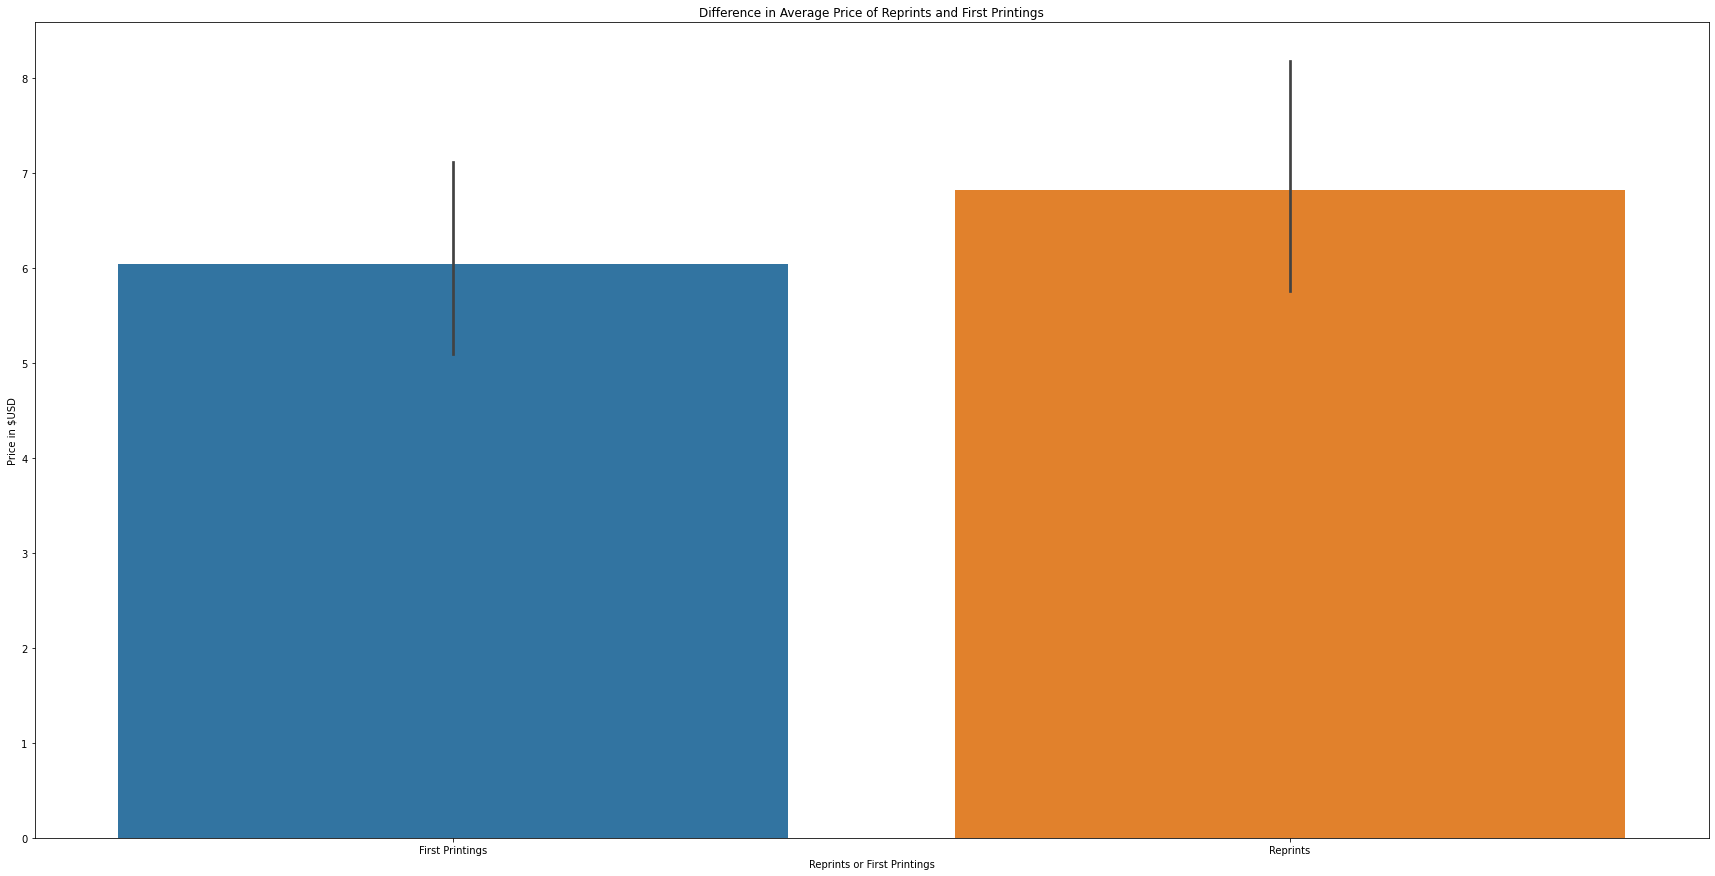

In [29]:
reprints_vs_first_prints_viz(train)

In [30]:
def avg_reprints_and_first_printings_and_diff(df):
    '''
    Returns the average price of cards in USD for reprints and first printings and the difference from reprints.
    '''
    avg_reprints = df.reprints_usd.mean()
    avg_first_prints = df.first_prints_usd.mean()
    return f'The average USD price of reprinted cards is ${round(avg_reprints, 2)},  and first print cards is ${round(avg_first_prints, 2)}. The difference in average price is ${round((avg_reprints - avg_first_prints),2)}.'

In [31]:
avg_reprints_and_first_printings_and_diff(train)

'The average USD price of reprinted cards is $6.82,  and first print cards is $6.04. The difference in average price is $0.77.'

Combine into a single visualation function

In [32]:
def reprint_or_not_viz(df):
    '''
    Combines explore functions for question two visualization
    '''
    df = add_columns_with_usd_prices_for_reprints_and_first_printings(df)
    diff = avg_reprints_and_first_printings_and_diff(df)
    viz = reprints_vs_first_prints_viz(df)
    return viz, diff

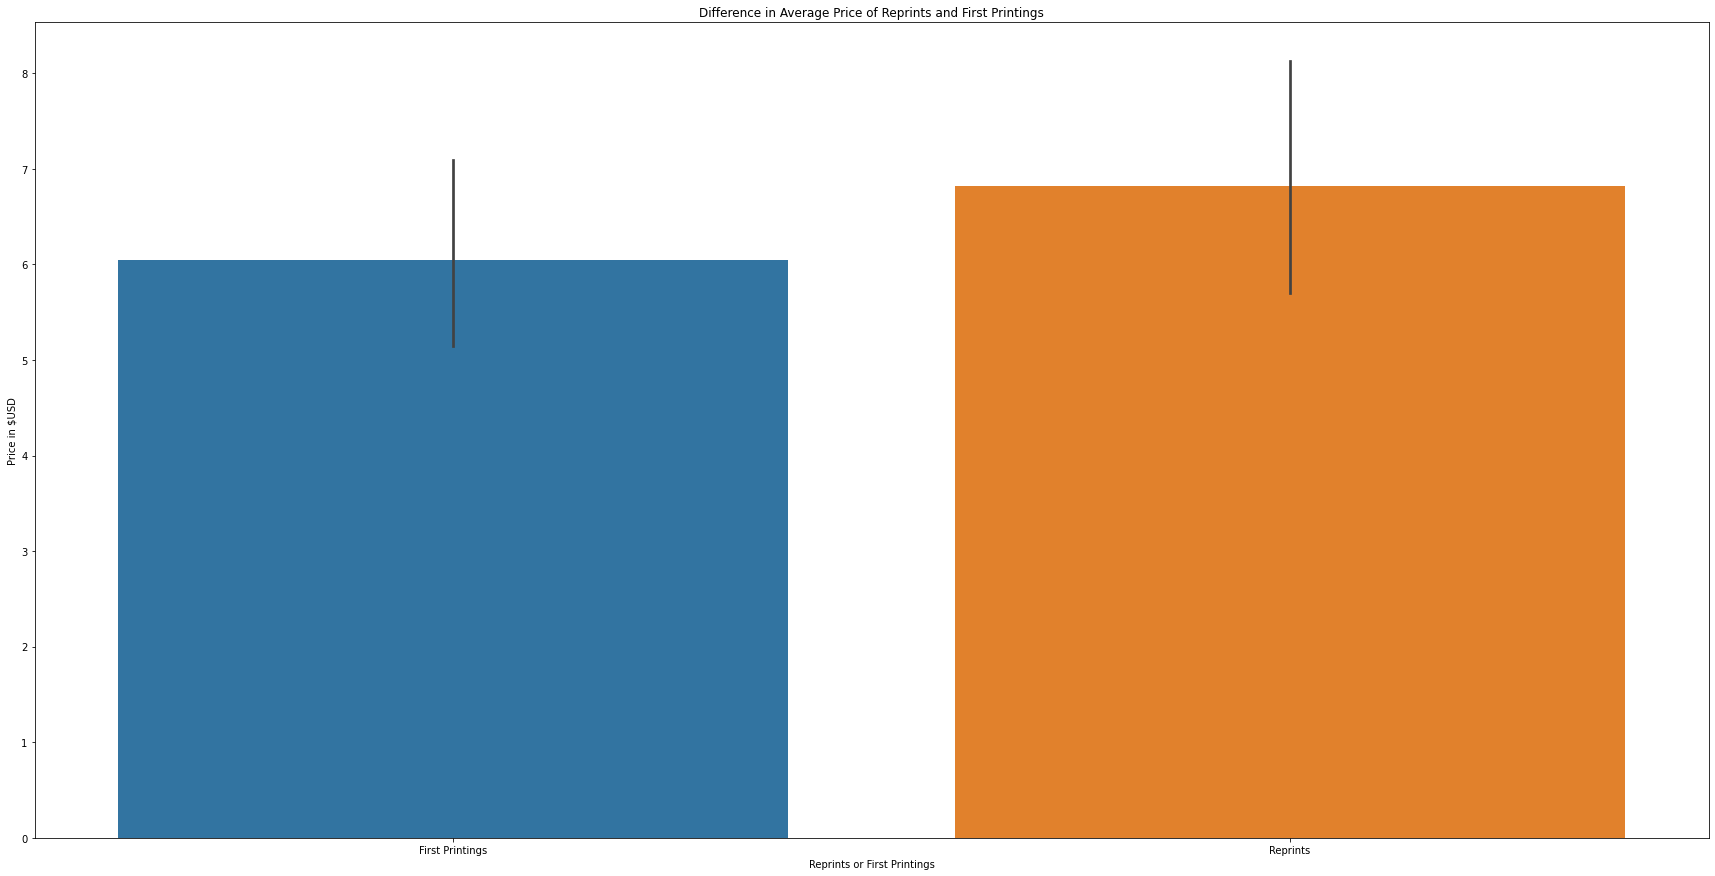

(None,
 'The average USD price of reprinted cards is $6.82,  and first print cards is $6.04. The difference in average price is $0.77.')

In [33]:
reprint_or_not_viz(train)

## Hypothesis Testing
Significance Level: α = 0.05
- $H_0$ = There is not a signficant difference in USD prices between reprints & first printings
- $H_A$ = There is a significant difference in USD prices between reprints & first printings

In [34]:
def q2_hypothesis_test(df):
    '''
    Hypothesis testing for question two using Two-sample T-Test with a 95% confidence interval
    '''
    # Sets alpha to 0.05 for 95% Confidence Interval
    α = 0.05
    
    print(f'Variance for non-foil only cards is {round(df.reprints_usd.var(), 3)}.')
    print(f'Variance for cards with both foil and non-foil cards is {round(df.first_prints_usd.var(), 3)}.')

    # T-Test returning t and p values ignoring nan values
    t, p = stats.ttest_ind(df.first_prints_usd, df.reprints_usd, equal_var = False, nan_policy = 'omit')
    
    # Prints statement for t-statistic and p-value
    if (t < 0) & (p/2 < α):
        print(f'The t-statistic is {round(t,3)} less than 0, and the p-value of {(p/2):.3e} is statistically significant.')
    elif (t < 0) & (p/2 > α):
        print(f'The t-statistic is {round(t,3)} less than 0, but the p-value of {(p/2):.3e} is not statistically significant.')
    elif (t > 0) & (p/2 < α):
        print(f'The t-statistic is {round(t,3)} more than 0, but the p-value of {(p/2):.3e} is statistically significant.')
    else:
        print(f'The t-statistic is {round(t,3)} more than 0, and the p-value of {(p/2):.3e} is not statistically significant.')
     
    # Prints statement for either accepting or rejecting the Null Hypothesis
    if p/2 < α:
        print("We reject the Null Hypothesis")
    else:
        print("We fail to reject the Null Hypothesis")
    return

In [35]:
q2_hypothesis_test(train)

Variance for non-foil only cards is 7721.256.
Variance for cards with both foil and non-foil cards is 5609.148.
The t-statistic is -0.952 less than 0, but the p-value of 1.705e-01 is not statistically significant.
We fail to reject the Null Hypothesis


Exploratory Mode

In [36]:
train['name'].value_counts()

Forest                390
Mountain              381
Island                372
Swamp                 367
Plains                349
                     ... 
Primitive Etchings      1
Power Depot             1
Weave Fate              1
Tithe                   1
Kamahl's Summons        1
Name: name, Length: 20589, dtype: int64

In [37]:
train['lang'].value_counts()

en     39907
es       130
fr       112
ja       104
zhs       28
it        26
ph         4
Name: lang, dtype: int64

In [38]:
train['released_at'].value_counts()

2019-11-07    1338
2021-04-23     733
2022-06-10     689
2022-04-29     660
2022-02-18     648
              ... 
2019-12-09       1
1997-10-01       1
2014-04-26       1
2006-10-21       1
2006-06-24       1
Name: released_at, Length: 309, dtype: int64

In [39]:
train['layout'].value_counts()

normal                38711
token                   606
transform               305
planar                  130
split                   102
modal_dfc                84
adventure                81
saga                     59
scheme                   49
emblem                   46
leveler                  38
vanguard                 24
flip                     23
host                     18
class                    13
augment                  12
double_faced_token        5
meld                      5
Name: layout, dtype: int64

In [40]:
train['highres_image'].value_counts()

True     38497
False     1814
Name: highres_image, dtype: int64

In [41]:
train['image_status'].value_counts()

highres_scan    38497
lowres           1580
placeholder       234
Name: image_status, dtype: int64

In [42]:
train['mana_cost'].value_counts()

                    5271
{1}{W}              1169
{1}{G}              1071
{1}{U}              1035
{2}{G}              1000
                    ... 
{13}{B}{B}             1
{3}{G} // {W}          1
{3}{R}{R}{R}{R}        1
{4}{W}{U}{U}{B}        1
{1}{W} // {2}{W}       1
Name: mana_cost, Length: 809, dtype: int64

In [43]:
train['cmc'].value_counts()

3.0     8436
2.0     7750
4.0     6498
0.0     5429
1.0     4239
5.0     4048
6.0     2290
7.0     1009
8.0      367
9.0      125
10.0      67
12.0      22
11.0      18
15.0       8
13.0       3
0.5        1
16.0       1
Name: cmc, dtype: int64

In [44]:
train['type_line'].value_counts()

Instant                                4605
Sorcery                                4326
Enchantment                            2090
Artifact                               2071
Land                                   1917
                                       ... 
Creature — Spirit Wolf                    1
Creature — Zombie Ogre Warrior            1
Plane — Kinshala                          1
Token Artifact — Gold                     1
Artifact Creature — Golem Construct       1
Name: type_line, Length: 2550, dtype: int64

In [45]:
train['oracle_text'].value_counts()

                                                                                                                                                                       940
no_oracle_text                                                                                                                                                         600
({T}: Add {G}.)                                                                                                                                                        394
({T}: Add {R}.)                                                                                                                                                        387
({T}: Add {U}.)                                                                                                                                                        377
                                                                                                                                                 

In [46]:
train['power'].value_counts()

0      21283
2       5626
1       4113
3       3427
4       2055
5       1207
0       1015
6        720
*        303
7        259
8        127
10        51
9         50
11        15
12        14
1+*        8
13         5
+2         4
+1         4
3.5        3
2+*        3
?          3
-1         3
15         3
2.5        2
∞          2
99         1
*²         1
+0         1
+3         1
.5         1
1.5        1
Name: power, dtype: int64

In [47]:
train['toughness'].value_counts()

0      21283
2       4725
1       4523
3       3686
4       2731
5       1360
6        775
0        340
7        306
*        248
8        141
9         55
10        45
1+*       16
11        16
12        15
13         9
2+*        3
*+1        3
+3         3
3.5        3
?          3
15         3
7-*        2
17         2
+4         2
-0         2
+2         2
+1         2
99         1
1.5        1
*²         1
+0         1
.5         1
14         1
2.5        1
Name: toughness, dtype: int64

In [48]:
train['colors'].value_counts()
# Separate colors into their own columns if they have that color?

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                 8339
[G]                5670
[B]                5533
[W]                5506
[R]                5500
[U]                5400
no_colors           394
[G, W]              361
[B, U]              351
[G, R]              344
[B, R]              337
[U, W]              335
[G, U]              320
[B, G]              317
[R, U]              310
[R, W]              310
[B, W]              308
[B, R, U]            98
[B, G, R]            85
[G, U, W]            82
[G, R, W]            79
[B, U, W]            79
[B, G, R, U, W]      58
[B, R, W]            43
[G, R, U]            38
[B, G, U]            37
[R, U, W]            35
[B, G, W]            34
[B, G, U, W]          3
[G, R, U, W]          3
[B, G, R, W]          1
[B, R, U, W]          1
Name: colors, dtype: int64

In [49]:
train['color_identity'].value_counts()
# Should I go based off of color identity or actual casting colors?

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[G]                6190
[B]                6030
[R]                6027
[W]                5932
[U]                5913
[]                 4342
[G, W]              544
[B, U]              543
[U, W]              526
[B, R]              515
[G, R]              513
[B, G]              473
[B, W]              458
[G, U]              456
[R, W]              450
[R, U]              449
[B, R, U]           128
[G, U, W]           112
[B, G, R, U, W]     109
[B, G, R]           109
[G, R, W]           107
[B, U, W]           104
[B, R, W]            68
[B, G, U]            55
[B, G, W]            53
[G, R, U]            50
[R, U, W]            47
[B, G, U, W]          3
[G, R, U, W]          3
[B, G, R, W]          1
[B, R, U, W]          1
Name: color_identity, dtype: int64

In [50]:
train['keywords'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                  24950
[Flying]                             2229
[Enchant]                            1457
[Equip]                               477
[Trample]                             406
                                    ...  
[Flying, Threshold, Mill]               1
[Persist, Flash]                        1
[Enrage, Vigilance, Proliferate]        1
[Vigilance, Formidable]                 1
[Evoke, Haste]                          1
Name: keywords, Length: 1252, dtype: int64

In [51]:
train['legalities'].value_counts()

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


{'standard': 'not_legal', 'future': 'not_legal', 'historic': 'not_legal', 'gladiator': 'not_legal', 'pioneer': 'not_legal', 'explorer': 'not_legal', 'modern': 'legal', 'legacy': 'legal', 'pauper': 'not_legal', 'vintage': 'legal', 'penny': 'legal', 'commander': 'legal', 'brawl': 'not_legal', 'historicbrawl': 'not_legal', 'alchemy': 'not_legal', 'paupercommander': 'not_legal', 'duel': 'legal', 'oldschool': 'not_legal', 'premodern': 'not_legal'}        3347
{'standard': 'not_legal', 'future': 'not_legal', 'historic': 'not_legal', 'gladiator': 'not_legal', 'pioneer': 'not_legal', 'explorer': 'not_legal', 'modern': 'legal', 'legacy': 'legal', 'pauper': 'legal', 'vintage': 'legal', 'penny': 'legal', 'commander': 'legal', 'brawl': 'not_legal', 'historicbrawl': 'not_legal', 'alchemy': 'not_legal', 'paupercommander': 'legal', 'duel': 'legal', 'oldschool': 'not_legal', 'premodern': 'not_legal'}                2969
{'standard': 'not_legal', 'future': 'not_legal', 'historic': 'legal', 'gladiator':

In [52]:
train['games'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[paper, mtgo]           20464
[paper]                 14176
[arena, paper, mtgo]     4610
[paper, mtgo, arena]      644
[arena, paper]            321
[]                         61
[paper, arena, mtgo]       35
Name: games, dtype: int64

In [53]:
train['reserved'].value_counts()

False    39742
True       569
Name: reserved, dtype: int64

In [54]:
train['foil'].value_counts()

True     23367
False    16944
Name: foil, dtype: int64

In [55]:
train['nonfoil'].value_counts()

True    40311
Name: nonfoil, dtype: int64

In [56]:
train['finishes'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[nonfoil, foil]            23174
[nonfoil]                  16930
[nonfoil, foil, etched]      193
[nonfoil, etched]             14
Name: finishes, dtype: int64

In [57]:
train['oversized'].value_counts()

False    40108
True       203
Name: oversized, dtype: int64

In [58]:
train['promo'].value_counts()

False    39149
True      1162
Name: promo, dtype: int64

In [59]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


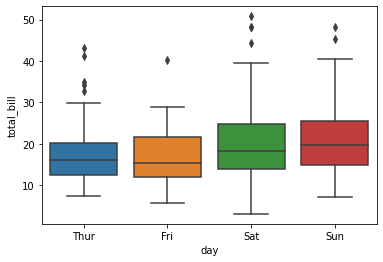

In [60]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

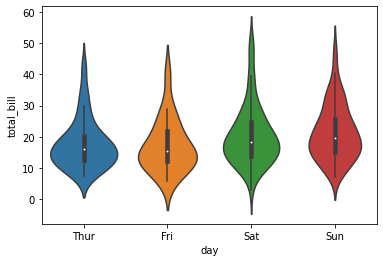

In [61]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

In [62]:
train.nonfoil.value_counts()

True    40311
Name: nonfoil, dtype: int64

In [63]:
train.nonfoil_only.value_counts()

False    23367
True     16944
Name: nonfoil_only, dtype: int64

In [64]:
train.foil.value_counts()

True     23367
False    16944
Name: foil, dtype: int64

In [65]:
train.head()

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd
39296,8e1e4b26-0a2b-4078-adb3-1f66315afcf5,Goblin Razerunners,en,2017-10-24,normal,True,highres_scan,{2}{R}{R},4.0,Creature — Goblin Warrior,"{1}{R}, Sacrifice a land: Put a +1/+1 counter ...",3,4,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,c77df674-0ef5-47d9-ab22-56a6e1dc901c,ddt,Duel Decks: Merfolk vs. Goblins,duel_deck,47,False,rare,Finding themselves in a new and unexplored wor...,Raymond Swanland,black,2015,False,False,False,False,10400.0,9300.0,"{'usd': '0.11', 'usd_foil': None, 'usd_etched'...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.11,False,False,False,True,False,0.11,0.00,0.11,0.11,NaN
30783,6f2fc246-2e95-456f-aa4e-97768c4f4bb4,Rites of Initiation,en,2001-10-01,normal,True,highres_scan,{R},1.0,Instant,Discard any number of cards at random. Creatur...,0,0,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,b0d90d2d-494a-4224-bfa0-36ce5ee281b1,ody,Odyssey,expansion,217,False,common,no_flavor_text,Bradley Williams,black,1997,False,False,True,False,13427.0,2777.0,"{'usd': '0.25', 'usd_foil': '3.75', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.25,True,False,False,False,True,0.00,0.25,-0.25,NaN,0.25
26765,606206c7-1a8a-46f4-b368-cf18e02f3df8,Undying Flames,en,2005-06-03,normal,True,highres_scan,{4}{R}{R},6.0,Sorcery,Exile cards from the top of your library until...,0,0,[R],[R],[Epic],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,4db16ad3-2b95-442f-bb6b-e9aa7fe7f769,sok,Saviors of Kamigawa,expansion,119,False,rare,no_flavor_text,Tsutomu Kawade,black,2003,False,False,True,False,17031.0,8830.0,"{'usd': '0.30', 'usd_foil': '2.21', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.30,True,False,False,False,True,0.00,0.30,-0.30,NaN,0.30
8690,1f391555-4697-4492-9854-32393f473104,Bombard,en,2018-11-16,normal,True,highres_scan,{2}{R},3.0,Instant,Bombard deals 4 damage to target creature.,0,0,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,cdbedc27-4f24-4d89-ace1-8da1b36ac78e,gnt,Game Night,box,37,False,common,"""Want to sink a ship? Blow a hole in the hull....",Alex Konstad,black,2015,False,False,False,False,15067.0,7465.0,"{'usd': '0.05', 'usd_foil': None, 'usd_etched'...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.05,False,False,False,True,False,0.05,0.00,0.05,0.05,NaN
25570,5c1f3f52-cb9b-4b2a-bb02-6175897ae76e,Our Market Research Shows That Players Like Re...,en,2004-11-19,normal,True,highres_scan,{1}{G}{G},3.0,Creature — Elemental,Art rampage 2 (Whenever this creature becomes ...,2,2,[G],[G],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,True,True,"[nonfoil, foil]",False,False,False,False,4c8bc76a-05a5-43db-aaf0-34deb34

In [66]:
df.promo_types.value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


no_promo                                   48810
[boosterfun]                                2227
[promopack, stamped]                         828
[setpromo]                                   628
[setpromo, promopack, stamped]               274
[planeswalkerdeck]                           176
[starterdeck]                                141
[instore]                                    135
[playerrewards]                               68
[promopack]                                   60
[boxtopper, boosterfun]                       40
[jpwalker]                                    36
[setpromo, gameday]                           33
[themepack]                                   32
[arenaleague]                                 32
[mediainsert]                                 28
[stamped, promopack]                          26
[premiereshop, instore]                       25
[brawldeck]                                   21
[bundle]                                      19
[draculaseries, boos

In [67]:
train.variation.value_counts()

False    40276
True        35
Name: variation, dtype: int64

In [68]:
train[train['variation'] == True]

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd
8836,1fbe115b-ded7-4749-95e2-b69bff26fc74,Bull Hippo,en,1997-05-01,normal,True,highres_scan,{3}{G},4.0,Creature — Hippo,Islandwalk (This creature can't be blocked as ...,3,3,[G],[G],"[Landwalk, Islandwalk]","{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,False,True,478c47df-5058-4ce6-830e-7e80732b2ca9,por,Portal,starter,160d,False,uncommon,no_flavor_text,Roger Raupp,black,1997,False,False,False,False,20836.0,0.0,"{'usd': '4.77', 'usd_foil': None, 'usd_etched'...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,4.77,False,False,False,True,False,4.77,0.00,4.77,NaN,4.77
54167,c34019cb-5d87-4451-a102-b751ea3a97f8,Coffin Puppets,ja,2000-06-05,normal,False,placeholder,{3}{B}{B},5.0,Creature — Zombie,Sacrifice two lands: Return Coffin Puppets fro...,3,3,[B],[B],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,True,c233bd36-57c0-4aa2-ae6c-7aeabfb4e3ce,pcy,Prophecy,expansion,60s,False,rare,no_flavor_text,Glen Angus,black,1997,False,False,True,False,21626.0,0.0,"{'usd': '0.27', 'usd_foil': '18.87', 'usd_etch...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.27,True,False,False,False,True,0.00,0.27,-0.27,NaN,0.27
68565,f732c92e-8e0a-4c77-a3c0-d9b9384e363f,Tamiyo's Journal,en,2016-04-08,normal,True,highres_scan,{5},5.0,Legendary Artifact,"At the beginning of your upkeep, investigate. ...",0,0,[],[],[Investigate],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,False,True,[nonfoil],False,False,False,True,5e914d7e-c1e9-446c-a33d-d093c02b2743,soi,Shadows over Innistrad,expansion,265†e,False,rare,Entry 922: There's more to Avacyn's madness . . .,Chase Stone,black,2015,False,False,False,False,1758.0,2688.0,"{'usd': '2.59', 'usd_foil': None, 'usd_etched'...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,2.59,False,False,False,True,False,2.59,0.00,2.59,NaN,2.59
30553,6e611291-7b1e-41c6-ae77-3923108e86f2,Phantom Centaur,en,2021-08-01,normal,True,highres_scan,{2}{G}{G},4.0,Creature — Centaur Spirit,Protection from black\nPhantom Centaur enters ...,2,0,[G],[G],[Protection],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,True,True,"[nonfoil, foil]",False,False,True,True,d13bfc70-6137-4179-aa96-da30fd84de29,mb1,Mystery Booster,masters,1292†,False,uncommon,no_flavor_text,Carl Critchlow,black,2015,False,False,False,False,17045.0,5841.0,"{'usd': '1.47', 'usd_foil': None, 'usd_etched'...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,1.47,True,False,False,False,True,0.00,1.47,-1.47,1.47,NaN
19152,45242fd6-6e36-468c-b9ef-140fc969d343,Tamiyo's Journal,en,2016-04-08,normal,True,highres_scan,{5},5.0,Legendary Artifact,"At the beginning of your upkeep, investigate. ...",0,0,[],[],[Investigate],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,False,True,[nonfoil],False,False,False,True,5e914d7e-c1e9-446c-a33d-d093c02b2743,soi,Shadows ove

In [69]:
train.games.value_counts(), train.finishes.value_counts()

([paper, mtgo]           20464
 [paper]                 14176
 [arena, paper, mtgo]     4610
 [paper, mtgo, arena]      644
 [arena, paper]            321
 []                         61
 [paper, arena, mtgo]       35
 Name: games, dtype: int64,
 [nonfoil, foil]            23174
 [nonfoil]                  16930
 [nonfoil, foil, etched]      193
 [nonfoil, etched]             14
 Name: finishes, dtype: int64)

In [89]:
train.booster.value_counts()

True     28118
False    12193
Name: booster, dtype: int64

In [71]:
train[train['loyalty'] != 0]

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd
67378,f2df3258-c053-48a8-974f-d80899b2cd93,"Ashiok, Dream Render",en,2019-05-03,normal,True,highres_scan,{1}{U/B}{U/B},3.0,Legendary Planeswalker — Ashiok,Spells and abilities your opponents control ca...,0,0,"[B, U]","[B, U]",[Mill],"{'standard': 'not_legal', 'future': 'not_legal...","[arena, paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,ee044f0b-e101-4ead-8d0e-aa510aad4277,war,War of the Spark,expansion,228,False,uncommon,no_flavor_text,Cynthia Sheppard,black,2015,False,False,True,False,616.0,0.0,"{'usd': '2.21', 'usd_foil': '6.01', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,5,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,2.21,True,False,False,False,True,0.0,2.21,-2.21,NaN,2.21
60589,da1a9643-34d6-4b4b-b896-2d4626eca40a,"Sorin, Solemn Visitor",en,2014-09-26,normal,True,highres_scan,{2}{W}{B},4.0,Legendary Planeswalker — Sorin,"+1: Until your next turn, creatures you contro...",0,0,"[B, W]","[B, W]",[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,6c7a715c-ded9-449e-89b0-c665773e9c3c,ktk,Khans of Tarkir,expansion,202,False,mythic,no_flavor_text,Cynthia Sheppard,black,2015,False,False,True,False,6144.0,0.0,"{'usd': '1.76', 'usd_foil': '9.43', 'usd_etche...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,4,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,1.76,True,False,False,False,True,0.0,1.76,-1.76,NaN,1.76
29395,69ef067b-58ac-4b88-a983-83316d157fcb,Geyadrone Dihada,en,2021-06-18,normal,True,highres_scan,{1}{U}{B}{R},4.0,Legendary Planeswalker — Dihada,Protection from permanents with corruption cou...,0,0,"[B, R, U]","[B, R, U]",[Protection],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,c1c7eb8c-f205-40ab-a609-767cb296544e,mh2,Modern Horizons 2,draft_innovation,305,False,mythic,no_flavor_text,Aleksi Briclot,borderless,2015,False,False,False,False,5134.0,0.0,"{'usd': '2.17', 'usd_foil': '5.07', 'usd_etche...",[boosterfun],oval,no_produced_mana,no_waterwark,no_frame_effects,4,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,2.17,True,False,False,False,True,0.0,2.17,-2.17,NaN,2.17
4858,112eb5ce-4fe5-45b3-b810-79fef74b07f9,"Ashiok, Nightmare Muse",en,2020-01-24,normal,True,highres_scan,{3}{U}{B},5.0,Legendary Planeswalker — Ashiok,+1: Create a 2/3 blue and black Nightmare crea...,0,0,"[B, U]","[B, U]",[],"{'standard': 'not_legal', 'future': 'not_legal...","[arena, paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,5f23a78d-cda1-462a-8be3-a62b40c34913,thb,Theros Beyond Death,expansion,208,False,mythic,no_flavor_text,Raymond Swanland,black,2015,False,False,True,False,2631.0,0.0,"{'usd': '4.48', 'usd_foil': '4.69', 'usd_etche...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,5,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,4.48,True,False,False,False,True,0.0,4.48,-4.48,NaN,4.48
48597,af2fdbec-bca2-4af5-9c2a-28b0b35b18a3,"Garruk, Unleashed",en,2020-07-03,normal,True,highres_scan,{2}{G}{G},4.0,Legendary Planeswalker — Garruk,+1: Up to one target creature gets +3/+3 and g...,0,0,[G],[G],[],"{'standard': 'not_legal',

In [72]:
styles = train[['frame_effects', 'border_color', 'flavor_text', 'frame', 'full_art', 'highres_image', 'lang', 'layout', 'promo_types', 'security_stamp', 'watermark', 'usd']].copy()
styles.head(3)

,frame_effects,border_color,flavor_text,frame,full_art,highres_image,lang,layout,promo_types,security_stamp,watermark,usd
39296,no_frame_effects,black,Finding themselves in a new and unexplored wor...,2015,False,True,en,normal,no_promo,oval,no_waterwark,0.11
30783,no_frame_effects,black,no_flavor_text,1997,False,True,en,normal,no_promo,no_security_stamp,no_waterwark,0.25
26765,no_frame_effects,black,no_flavor_text,2003,False,True,en,normal,no_promo,no_security_stamp,no_waterwark,0.30


In [73]:
styles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40311 entries, 39296 to 2198
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame_effects   40311 non-null  object 
 1   border_color    40311 non-null  object 
 2   flavor_text     40311 non-null  object 
 3   frame           40311 non-null  object 
 4   full_art        40311 non-null  bool   
 5   highres_image   40311 non-null  bool   
 6   lang            40311 non-null  object 
 7   layout          40311 non-null  object 
 8   promo_types     40311 non-null  object 
 9   security_stamp  40311 non-null  object 
 10  watermark       40311 non-null  object 
 11  usd             40311 non-null  float64
dtypes: bool(2), float64(1), object(9)
memory usage: 4.5+ MB


In [75]:
def add_columns_with_usd_prices_for_styles(df):
    '''
    Adds columns to dataframe with the usd prices of the card style related fields.
    '''
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['frame_effects'] == True, 'frame_effects_usd'] = df['usd']
    
    # Creates a column with USD prices for cards with both foil and non-foil versions
    df.loc[df['border_color'] == True, 'border_color_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['flavor_text'] == True, 'flavor_text_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['frame'] == True, 'frame_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['full_art'] == True, 'full_art_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['highres_image'] == True, 'highres_images_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['lang'] == True, 'lang_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['layout'] == True, 'layout_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['promo_types'] == True, 'promo_types_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['security_stamp'] == True, 'security_stamp_usd'] = df['usd']
    
    # Creates a column with USD prices for non-foil only cards
    df.loc[df['watermark'] == True, 'watermark_usd'] = df['usd']
    return df

In [76]:
add_columns_with_usd_prices_for_styles(train)
train.head(3)

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd,frame_effects_usd,border_color_usd,flavor_text_usd,frame_usd,full_art_usd,highres_images_usd,lang_usd,layout_usd,promo_types_usd,security_stamp_usd,watermark_usd
39296,8e1e4b26-0a2b-4078-adb3-1f66315afcf5,Goblin Razerunners,en,2017-10-24,normal,True,highres_scan,{2}{R}{R},4.0,Creature — Goblin Warrior,"{1}{R}, Sacrifice a land: Put a +1/+1 counter ...",3,4,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,c77df674-0ef5-47d9-ab22-56a6e1dc901c,ddt,Duel Decks: Merfolk vs. Goblins,duel_deck,47,False,rare,Finding themselves in a new and unexplored wor...,Raymond Swanland,black,2015,False,False,False,False,10400.0,9300.0,"{'usd': '0.11', 'usd_foil': None, 'usd_etched'...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.11,False,False,False,True,False,0.11,0.00,0.11,0.11,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,NaN
30783,6f2fc246-2e95-456f-aa4e-97768c4f4bb4,Rites of Initiation,en,2001-10-01,normal,True,highres_scan,{R},1.0,Instant,Discard any number of cards at random. Creatur...,0,0,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,b0d90d2d-494a-4224-bfa0-36ce5ee281b1,ody,Odyssey,expansion,217,False,common,no_flavor_text,Bradley Williams,black,1997,False,False,True,False,13427.0,2777.0,"{'usd': '0.25', 'usd_foil': '3.75', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.25,True,False,False,False,True,0.00,0.25,-0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN
26765,606206c7-1a8a-46f4-b368-cf18e02f3df8,Undying Flames,en,2005-06-03,normal,True,highres_scan,{4}{R}{R},6.0,Sorcery,Exile cards from the top of your library until...,0,0,[R],[R],[Epic],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,4db16ad3-2b95-442f-bb6b-e9aa7fe7f769,sok,Saviors of Kamigawa,expansion,119,False,rare,no_flavor_text,Tsutomu Kawade,black,2003,False,False,True,False,17031.0,8830.0,"{'usd': '0.30', 'usd_foil': '2.21', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.30,True,False,False,False,True,0.00,0.30,-0.30,NaN,0.30,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN


In [77]:
def avgs_of_different_styles_in_usd(df):
    '''
    Returns the average price of cards in USD for different styles.
    '''
    avg_frame_effects = df.frame_effects_usd.mean()
    avg_border_color = df.border_color_usd.mean()
    avg_flavor_text = df.flavor_text_usd.mean()
    avg_frame = df.frame_usd.mean()
    avg_full_art = df.full_art_usd.mean()
    avg_highres_images = df.highres_images_usd.mean()
    avg_lang = df.lang_usd.mean()
    avg_layout = df.layout_usd.mean()
    avg_promo_types = df.promo_types_usd.mean()
    avg_security_stamp = df.security_stamp_usd.mean()
    avg_watermark = df.watermark_usd.mean()
    
    return f'The average USD price of different styles ${round(avg_frame_effects, 2)}, ${round(avg_border_color, 2)}, ${round(avg_flavor_text, 2)}, ${round(avg_frame, 2)}, ${round(avg_full_art, 2)}, ${round(avg_highres_images, 2)}, ${round(avg_lang, 2)}, ${round(avg_layout, 2)}, ${round(avg_promo_types, 2)}, ${round(avg_security_stamp, 2)}, and ${round(avg_watermark, 2)},'

In [78]:
avgs_of_different_styles_in_usd(train)

'The average USD price of different styles $nan, $nan, $nan, $nan, $2.54, $6.49, $nan, $nan, $nan, $nan, and $nan,'

In [85]:
train.full_art_usd.value_counts()

0.21    10
0.24     9
0.22     6
0.20     6
0.26     6
        ..
4.33     1
1.72     1
0.44     1
7.24     1
3.30     1
Name: full_art_usd, Length: 167, dtype: int64

In [79]:
train.head(3)

,id,name,lang,released_at,layout,highres_image,image_status,mana_cost,cmc,type_line,oracle_text,power,toughness,colors,color_identity,keywords,legalities,games,reserved,foil,nonfoil,finishes,oversized,promo,reprint,variation,set_id,set,set_name,set_type,collector_number,digital,rarity,flavor_text,artist,border_color,frame,full_art,textless,booster,story_spotlight,edhrec_rank,penny_rank,prices,promo_types,security_stamp,produced_mana,watermark,frame_effects,loyalty,printed_name,color_indicator,life_modifier,hand_modifier,content_warning,flavor_name,usd,is_foil,is_etched,is_glossy,nonfoil_only,foil_and_nonfoil,nonfoil_only_usd,foil_and_nonfoil_usd,nonfoil_only_and_both_diff,reprints_usd,first_prints_usd,frame_effects_usd,border_color_usd,flavor_text_usd,frame_usd,full_art_usd,highres_images_usd,lang_usd,layout_usd,promo_types_usd,security_stamp_usd,watermark_usd
39296,8e1e4b26-0a2b-4078-adb3-1f66315afcf5,Goblin Razerunners,en,2017-10-24,normal,True,highres_scan,{2}{R}{R},4.0,Creature — Goblin Warrior,"{1}{R}, Sacrifice a land: Put a +1/+1 counter ...",3,4,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...",[paper],False,False,True,[nonfoil],False,False,True,False,c77df674-0ef5-47d9-ab22-56a6e1dc901c,ddt,Duel Decks: Merfolk vs. Goblins,duel_deck,47,False,rare,Finding themselves in a new and unexplored wor...,Raymond Swanland,black,2015,False,False,False,False,10400.0,9300.0,"{'usd': '0.11', 'usd_foil': None, 'usd_etched'...",no_promo,oval,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.11,False,False,False,True,False,0.11,0.00,0.11,0.11,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,NaN
30783,6f2fc246-2e95-456f-aa4e-97768c4f4bb4,Rites of Initiation,en,2001-10-01,normal,True,highres_scan,{R},1.0,Instant,Discard any number of cards at random. Creatur...,0,0,[R],[R],[],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,b0d90d2d-494a-4224-bfa0-36ce5ee281b1,ody,Odyssey,expansion,217,False,common,no_flavor_text,Bradley Williams,black,1997,False,False,True,False,13427.0,2777.0,"{'usd': '0.25', 'usd_foil': '3.75', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.25,True,False,False,False,True,0.00,0.25,-0.25,NaN,0.25,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN
26765,606206c7-1a8a-46f4-b368-cf18e02f3df8,Undying Flames,en,2005-06-03,normal,True,highres_scan,{4}{R}{R},6.0,Sorcery,Exile cards from the top of your library until...,0,0,[R],[R],[Epic],"{'standard': 'not_legal', 'future': 'not_legal...","[paper, mtgo]",False,True,True,"[nonfoil, foil]",False,False,False,False,4db16ad3-2b95-442f-bb6b-e9aa7fe7f769,sok,Saviors of Kamigawa,expansion,119,False,rare,no_flavor_text,Tsutomu Kawade,black,2003,False,False,True,False,17031.0,8830.0,"{'usd': '0.30', 'usd_foil': '2.21', 'usd_etche...",no_promo,no_security_stamp,no_produced_mana,no_waterwark,no_frame_effects,0,no_printed_name,no_color_indicator,0.0,0.0,False,no_flavor,0.30,True,False,False,False,True,0.00,0.30,-0.30,NaN,0.30,NaN,NaN,NaN,NaN,NaN,0.30,NaN,NaN,NaN,NaN,NaN


In [87]:
train.border_color.value_counts()

black         36003
white          2787
gold            680
borderless      452
silver          389
Name: border_color, dtype: int64

In [81]:
train.frame_effects_usd

39296   NaN
30783   NaN
26765   NaN
8690    NaN
25570   NaN
         ..
60911   NaN
58616   NaN
1656    NaN
4195    NaN
2198    NaN
Name: frame_effects_usd, Length: 40311, dtype: float64

In [82]:
avg_frame_effects = train.frame_effects_usd.mean()
avg_frame_effects

nan

In [83]:
# plot the dataframe
train.plot(x=styles.usd, y = styles['frame_effects', 'border_color', 'flavor_text', 'frame', 'full_art', 'highres_image', 'lang', 'layout', 'promo_types', 'security_stamp', 'watermark'], kind="bar", figsize=(30, 15))
 
# print bar graph
plt.show()

KeyError: ('frame_effects', 'border_color', 'flavor_text', 'frame', 'full_art', 'highres_image', 'lang', 'layout', 'promo_types', 'security_stamp', 'watermark')